In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"healthcare_data.csv", encoding='unicode_escape')

In [5]:
df.head()

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Discharge Date,Age,Days of treatment,Month of admission,Doctor,Hospital,Room Number,Insurance Provider,Bill amount,Admission Type,Test Results,Medication
0,Bobby Jackson,Male,B-,Cancer,31/1/24,2/2/24,30,2,Jan,Matthew Smith,Sons and Miller,328,Blue Cross,18856.2813,Urgent,Normal,Paracetamol
1,Leslie Terry,Male,A+,Obesity,20/8/19,26/8/19,62,6,Aug,Samantha Davies,Kim Inc,265,Medicare,33643.3273,Emergency,Inconclusive,Ibuprofen
2,Danny Smith,Female,A-,Obesity,22/9/22,7/10/22,76,15,Sep,Tiffany Mitchell,Cook PLC,205,Aetna,27955.0961,Emergency,Normal,Aspirin
3,Andrew Watts,Female,O+,Diabetes,18/11/20,18/12/20,28,30,Nov,Kevin Wells,"Hernandez Rogers and Vang,",450,Medicare,37909.7824,Elective,Abnormal,Ibuprofen
4,Adrienne Bell,Female,AB+,Cancer,19/9/22,9/10/22,43,20,Sep,Kathleen Hanna,White-White,458,Aetna,14238.3178,Urgent,Abnormal,Penicillin


In [5]:
df.rename(columns={'Billing Amount' : 'Bill amount'}, inplace=True)

In [5]:
# A general descriptive analysis of the data.
df.describe()

,Age,Days of treatment,Room Number,Billing Amount
count,54966.000000,54966.000000,54966.000000,54966.000000
mean,51.535185,15.499290,301.124404,25544.306289
std,19.605661,8.661471,115.223143,14208.409712
min,13.000000,1.000000,101.000000,-2008.492100
25%,35.000000,8.000000,202.000000,13243.718625
50%,52.000000,15.000000,302.000000,25542.749150
75%,68.000000,23.000000,401.000000,37819.858175
max,89.000000,30.000000,500.000000,52764.276700


In [6]:
df.shape

(54966, 17)

In [4]:
df.columns

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Discharge Date', 'Age', 'Days of treatment',
       'Month of admission', 'Doctor', 'Hospital', 'Room Number',
       'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Test Results', 'Medication'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Gender              54966 non-null  object 
 2   Blood Type          54966 non-null  object 
 3   Medical Condition   54966 non-null  object 
 4   Date of Admission   54966 non-null  object 
 5   Discharge Date      54966 non-null  object 
 6   Age                 54966 non-null  int64  
 7   Days of treatment   54966 non-null  int64  
 8   Month of admission  54966 non-null  object 
 9   Doctor              54966 non-null  object 
 10  Hospital            54966 non-null  object 
 11  Room Number         54966 non-null  int64  
 12  Insurance Provider  54966 non-null  object 
 13  Billing Amount      54966 non-null  float64
 14  Admission Type      54966 non-null  object 
 15  Test Results        54966 non-null  object 
 16  Medi

In [6]:
# Code to have the sum of all the null values in the dataset.
df.isnull().sum()

Name                  0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Discharge Date        0
Age                   0
Days of treatment     0
Month of admission    0
Doctor                0
Hospital              0
Room Number           0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Test Results          0
Medication            0
dtype: int64

In [8]:
# The unique values in each of the columns in the dataset.
df.nunique()

Name                  40235
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Discharge Date         1856
Age                      77
Days of treatment        30
Month of admission       12
Doctor                40341
Hospital              39876
Room Number             400
Insurance Provider        5
Billing Amount        49997
Admission Type            3
Test Results              3
Medication                5
dtype: int64

In [10]:
# Code that sorts the billing amount in descending order.
df.sort_values(by="Billing Amount", ascending=False).head(10)

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Discharge Date,Age,Days of treatment,Month of admission,Doctor,Hospital,Room Number,Insurance Provider,Billing Amount,Admission Type,Test Results,Medication
36349,Todd Carrillo,Female,A+,Hypertension,8/9/23,4/10/23,51,26,Sep,Kathleen Griffin,Griffin Group,209,Blue Cross,52764.2767,Elective,Normal,Ibuprofen
51183,Karen Kline,Female,AB+,Cancer,19/6/21,3/7/21,74,14,Jun,Dr. Joseph Gordon,Hernandez-Morton,181,UnitedHealthcare,52373.0324,Urgent,Inconclusive,Penicillin
34613,Karen Kline,Female,AB+,Cancer,19/6/21,3/7/21,79,14,Jun,Dr. Joseph Gordon,Hernandez-Morton,181,UnitedHealthcare,52373.0324,Urgent,Inconclusive,Penicillin
5735,David Sandoval,Male,AB-,Hypertension,2/11/19,11/11/19,22,9,Nov,Taylor Novak,Sons and Bailey,228,Blue Cross,52271.6638,Emergency,Normal,Ibuprofen
7088,Kathryn Gonzales,Female,O+,Diabetes,11/8/20,12/8/20,18,1,Aug,Kristin Clark,Miller Ltd,383,Aetna,52211.8530,Urgent,Inconclusive,Paracetamol
1574,Brett Marshall,Female,B+,Asthma,10/11/21,17/11/21,42,7,Nov,Robert Hartman,PLC Garner,140,Aetna,52181.8378,Emergency,Inconclusive,Penicillin
6663,Laurie Hood,Female,A-,Arthritis,27/6/21,29/6/21,42,2,Jun,Brian Riley,Walker-Garcia,306,Cigna,52170.0369,Urgent,Normal,Penicillin
52551,Laurie Hood,Female,A-,Arthritis,27/6/21,29/6/21,43,2,Jun,Brian Riley,Walker-Garcia,306,Cigna,52170.0369,Urgent,Normal,Penicillin
33117,Justin Clark,Female,AB+,Cancer,30/5/19,22/6/19,53,23,May,Andrea Jones,Ruiz-Anthony,399,UnitedHealthcare,52154.2377,Urgent,Normal,Aspirin
34368,Scott Powell,Female,B+,Cancer,20/5/19,29/5/19,38,9,May,Stephen Hood PhD,George-Gonzalez,155,Cigna,52102.2409,Emergency,Normal,Ibuprofen


In [7]:
df["Blood Type"].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

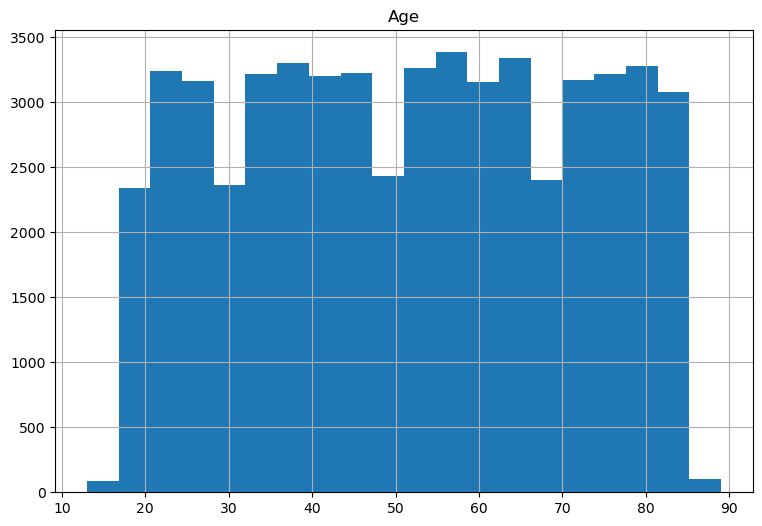

In [8]:
# Making a histogram on the age of the patients
df.hist("Age", figsize=(9,6), bins=20)

In [9]:
df["Days of treatment"].describe()

count    54966.000000
mean        15.499290
std          8.661471
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Days of treatment, dtype: float64

<Axes: >

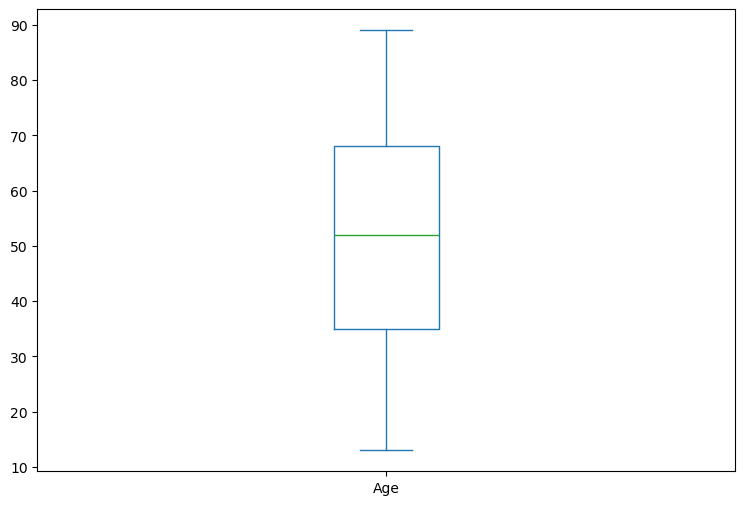

In [6]:
df["Age"].plot(kind="box", figsize=(9,6))

In [8]:
genders = df["Gender"].value_counts()


<Axes: xlabel='Gender', ylabel='Days of treatment'>

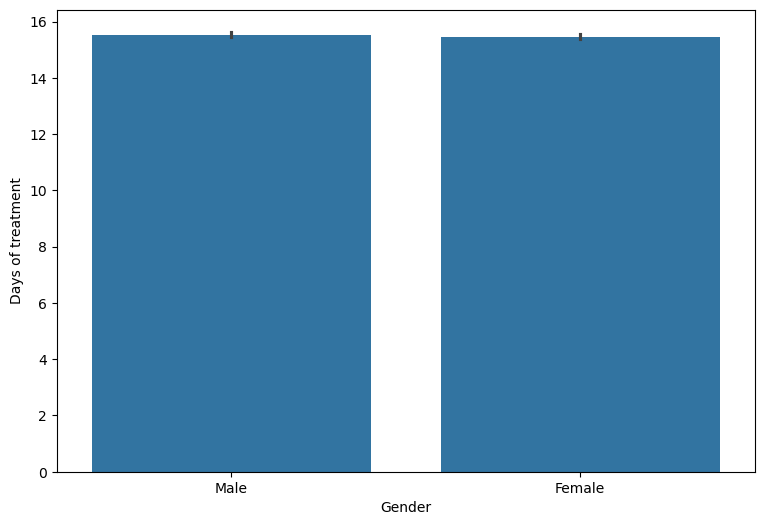

In [15]:
# This shows the average days of treatment according to gender.
plt.figure(figsize=(9,6))
sns.barplot(data=df, x="Gender", y ="Days of treatment")

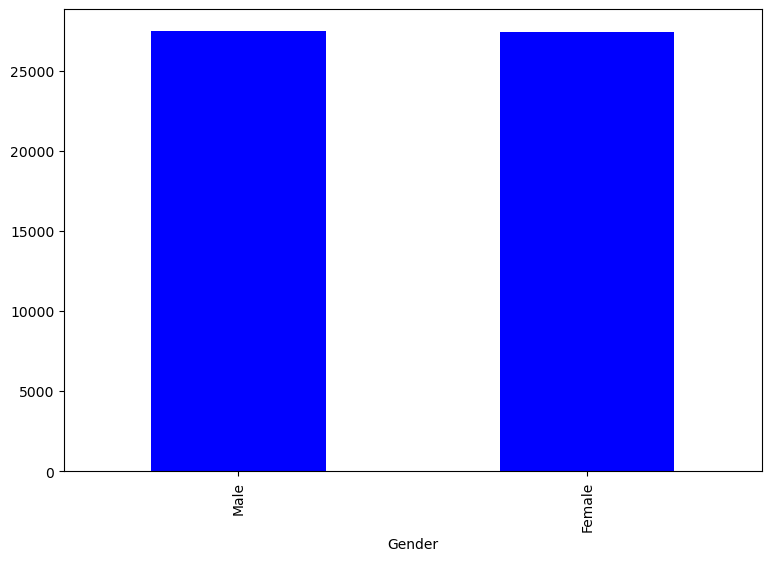

In [16]:
plt.figure(figsize=(9,6))
genders.plot(kind='bar', color='blue')
plt.show()

In [6]:
df.head()

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Discharge Date,Age,Days of treatment,Month of admission,Doctor,Hospital,Room Number,Insurance Provider,Bill amount,Admission Type,Test Results,Medication
0,Bobby Jackson,Male,B-,Cancer,31/1/24,2/2/24,30,2,Jan,Matthew Smith,Sons and Miller,328,Blue Cross,18856.2813,Urgent,Normal,Paracetamol
1,Leslie Terry,Male,A+,Obesity,20/8/19,26/8/19,62,6,Aug,Samantha Davies,Kim Inc,265,Medicare,33643.3273,Emergency,Inconclusive,Ibuprofen
2,Danny Smith,Female,A-,Obesity,22/9/22,7/10/22,76,15,Sep,Tiffany Mitchell,Cook PLC,205,Aetna,27955.0961,Emergency,Normal,Aspirin
3,Andrew Watts,Female,O+,Diabetes,18/11/20,18/12/20,28,30,Nov,Kevin Wells,"Hernandez Rogers and Vang,",450,Medicare,37909.7824,Elective,Abnormal,Ibuprofen
4,Adrienne Bell,Female,AB+,Cancer,19/9/22,9/10/22,43,20,Sep,Kathleen Hanna,White-White,458,Aetna,14238.3178,Urgent,Abnormal,Penicillin


In [11]:
df["Medical Condition"].describe()

count         54966
unique            6
top       Arthritis
freq           9218
Name: Medical Condition, dtype: object

In [12]:
condition = df["Medical Condition"].value_counts()

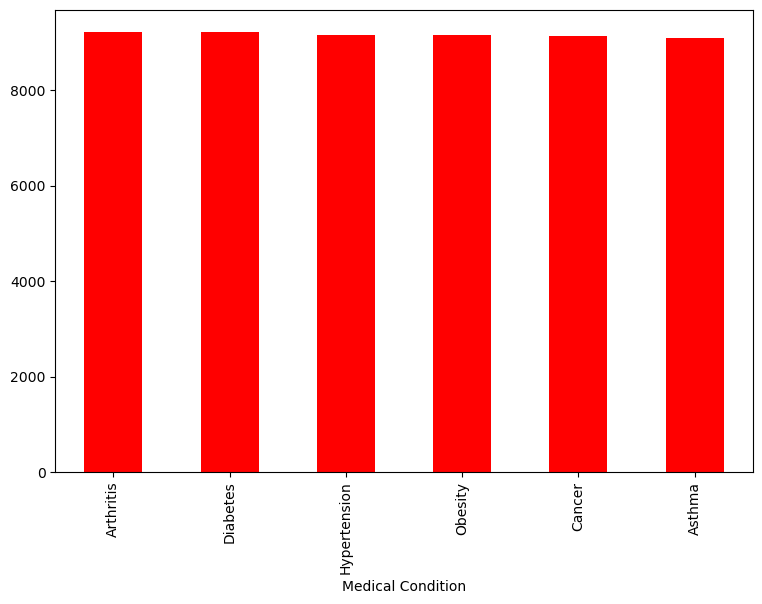

In [15]:
plt.figure(figsize=(9,6))
condition.plot(kind='bar', color = 'red')
plt.show()